# UTKFace Data Preparation Notebook

This notebook is designed to organize the UTKFace dataset to follow the standard format used by other dataset which is to have an Images folder that holds all the images and a labels.csv file that holds all the labels.

The dataset is structured as:
```text
UTKFace:
|---1_0_0_20161219140623097.jpg.chip.jpg
|---...

Where each image name holds the label information and is structured as:
[age]_[gender]_[race]_[date&time].jpg
age: int (1 - 116). It will be transformed into the range from 1 to 101
gender: 0 = male, 1 = female (will be converted to male = 1, female = 0)
race: 0 to 4 denoting white, black, asian, indian, and others, respectively.

In [1]:
import numpy as np, os, pandas as pd, shutil, matplotlib.pyplot as plt
os.chdir('..')

In [2]:
output_dir = os.path.join('data', 'datasets', 'age gender and race estimation', 'UTKFace')
os.path.exists(output_dir)

True

In [3]:
old_images_dir = os.path.join(output_dir, 'UTKFace')
os.path.exists(old_images_dir)

True

In [4]:
new_images_dir = os.path.join(output_dir, 'Images')
os.makedirs(new_images_dir, exist_ok = True)

In [5]:
ages = []
genders = []
races = []
date_times = [] # will be used for sorting
old_image_names = []
for file in os.listdir(old_images_dir):
    cleaned_filename = file.replace('.jpg.chip.jpg', '')
    
    try: # a few images don't have a race label. we will ignore them.
        age, gender, race, date_time = cleaned_filename.split('_')
    except:
        continue

    if int(age) > 101:
        continue
    
    ages.append(int(age))
    genders.append(1 - int(gender))
    races.append(int(race))
    date_times.append(date_time)
    old_image_names.append(file)


In [6]:
sorted_idx = np.argsort(date_times)
date_times = [date_times[i] for i in sorted_idx]
races = [races[i] for i in sorted_idx]
genders = [genders[i] for i in sorted_idx]
ages = [ages[i] for i in sorted_idx]
old_image_names = [old_image_names[i] for i in sorted_idx]

In [7]:
for i in range(len(old_image_names)): # sanity check
    print(f'{old_image_names[i]} : {ages[i]} : {genders[i]} : {races[i]} : {date_times[i]}')

1_0_2_20161219140525218.jpg.chip.jpg : 1 : 1 : 2 : 20161219140525218
1_0_2_20161219140530307.jpg.chip.jpg : 1 : 1 : 2 : 20161219140530307
1_0_2_20161219140540938.jpg.chip.jpg : 1 : 1 : 2 : 20161219140540938
6_1_2_20161219140554092.jpg.chip.jpg : 6 : 0 : 2 : 20161219140554092
1_1_2_20161219140604000.jpg.chip.jpg : 1 : 0 : 2 : 20161219140604000
1_0_0_20161219140623097.jpg.chip.jpg : 1 : 1 : 0 : 20161219140623097
1_0_0_20161219140627985.jpg.chip.jpg : 1 : 1 : 0 : 20161219140627985
1_1_2_20161219140638264.jpg.chip.jpg : 1 : 0 : 2 : 20161219140638264
1_0_0_20161219140642920.jpg.chip.jpg : 1 : 1 : 0 : 20161219140642920
2_1_2_20161219140650888.jpg.chip.jpg : 2 : 0 : 2 : 20161219140650888
2_1_2_20161219140706417.jpg.chip.jpg : 2 : 0 : 2 : 20161219140706417
2_0_2_20161219140712432.jpg.chip.jpg : 2 : 1 : 2 : 20161219140712432
4_1_2_20161219140718600.jpg.chip.jpg : 4 : 0 : 2 : 20161219140718600
2_1_2_20161219140736641.jpg.chip.jpg : 2 : 0 : 2 : 20161219140736641
1_0_2_20161219140744200.jpg.chip.j

In [8]:
new_image_names = []
for i in range(len(old_image_names)):
    new_name = f'{i}.jpg'

    shutil.copy(
        src = os.path.join(old_images_dir, old_image_names[i]),
        dst = os.path.join(new_images_dir, new_name)
    )

    new_image_names.append(new_name)

In [9]:
labels_df = pd.DataFrame(
    data = {
        'filename' : new_image_names,
        'age' : ages,
        'gender' : genders,
        'race' : races
    }
)

labels_df.to_csv(os.path.join(output_dir, 'labels.csv'), index = False)

## EDA

In [10]:
labels_df = pd.read_csv(os.path.join(output_dir, 'labels.csv'))

In [11]:
labels_df.head()

,filename,age,gender,race
0,0.jpg,1,1,2
1,1.jpg,1,1,2
2,2.jpg,1,1,2
3,3.jpg,6,0,2
4,4.jpg,1,0,2


In [12]:
len(labels_df)

23686

In [13]:
genders, counts = np.unique(labels_df['gender'], return_counts = True)

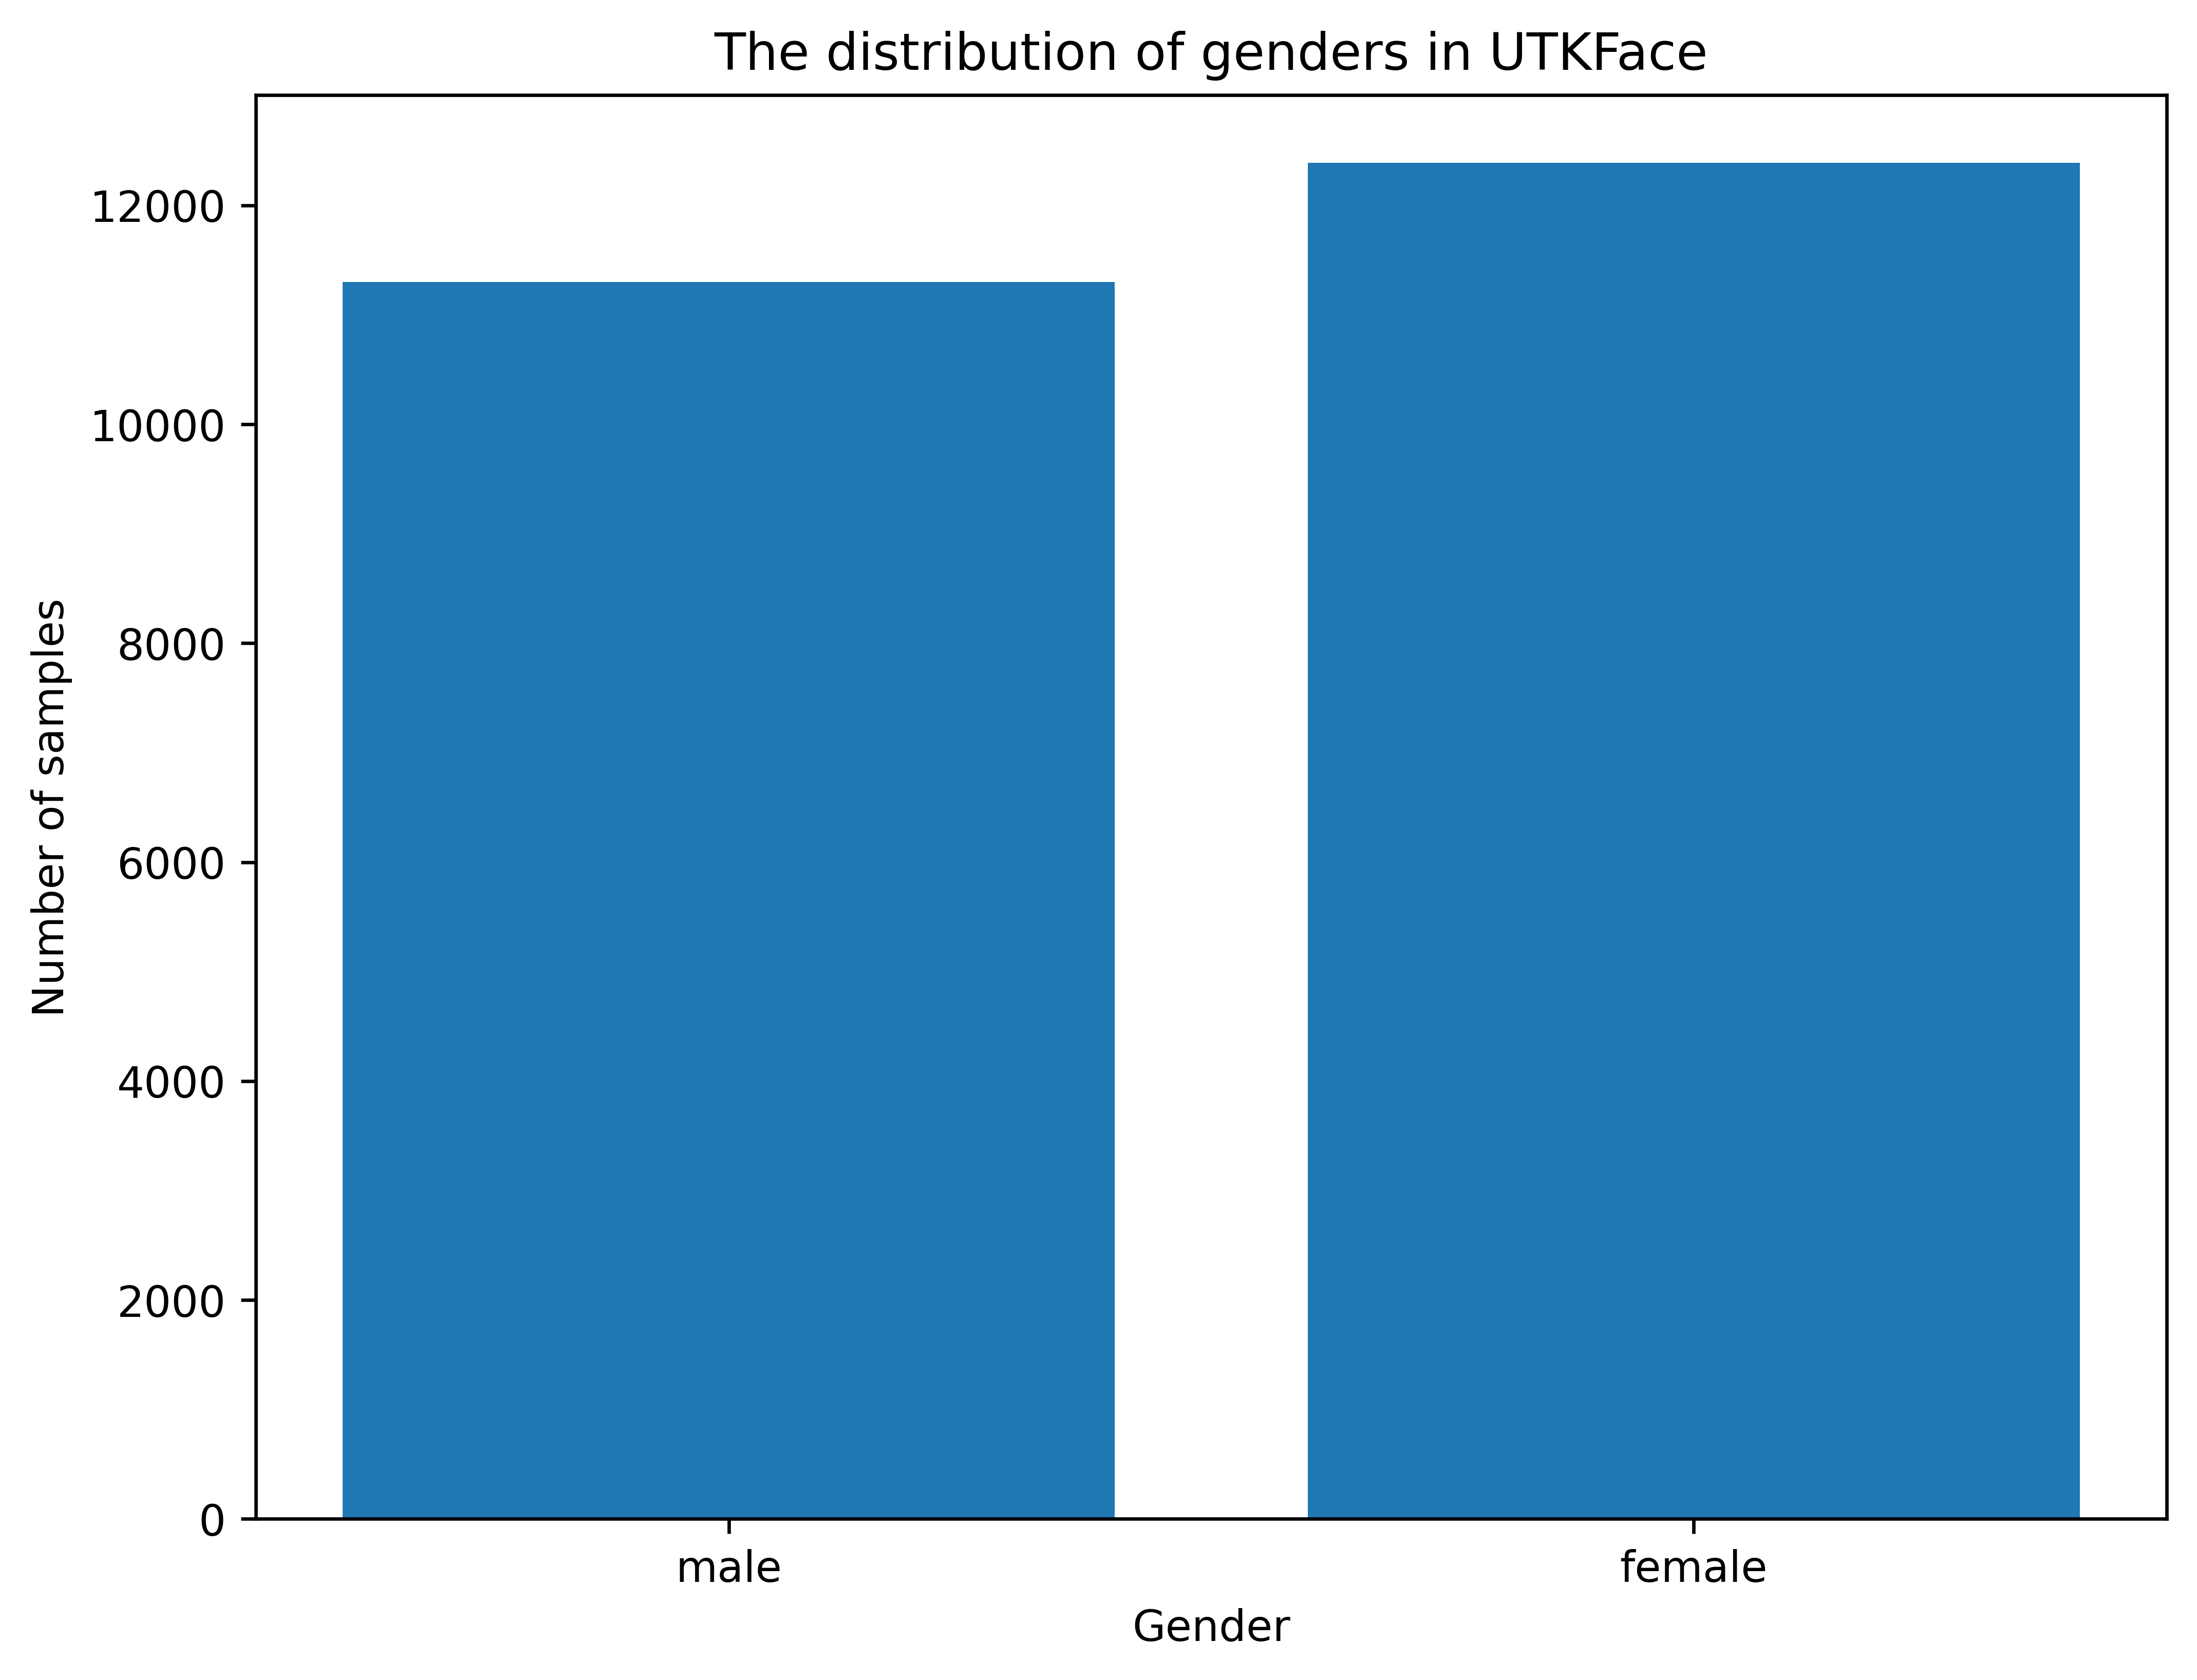

In [14]:
plt.figure(figsize = (8, 6), dpi = 600)
plt.title('The distribution of genders in UTKFace')
plt.bar(x = ['male', 'female'], height = counts)
plt.xlabel('Gender')
plt.ylabel('Number of samples')
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'UTKFace', 'The distribution of genders in UTKFace')
)
plt.show()

In [15]:
ages, counts = np.unique(labels_df['age'], return_counts = True)

In [17]:
average_age = sum(ages*counts) / sum(counts)
print(f'The average age in UTKFace is: {average_age}')

The average age in UTKFace is: 33.23904416110783


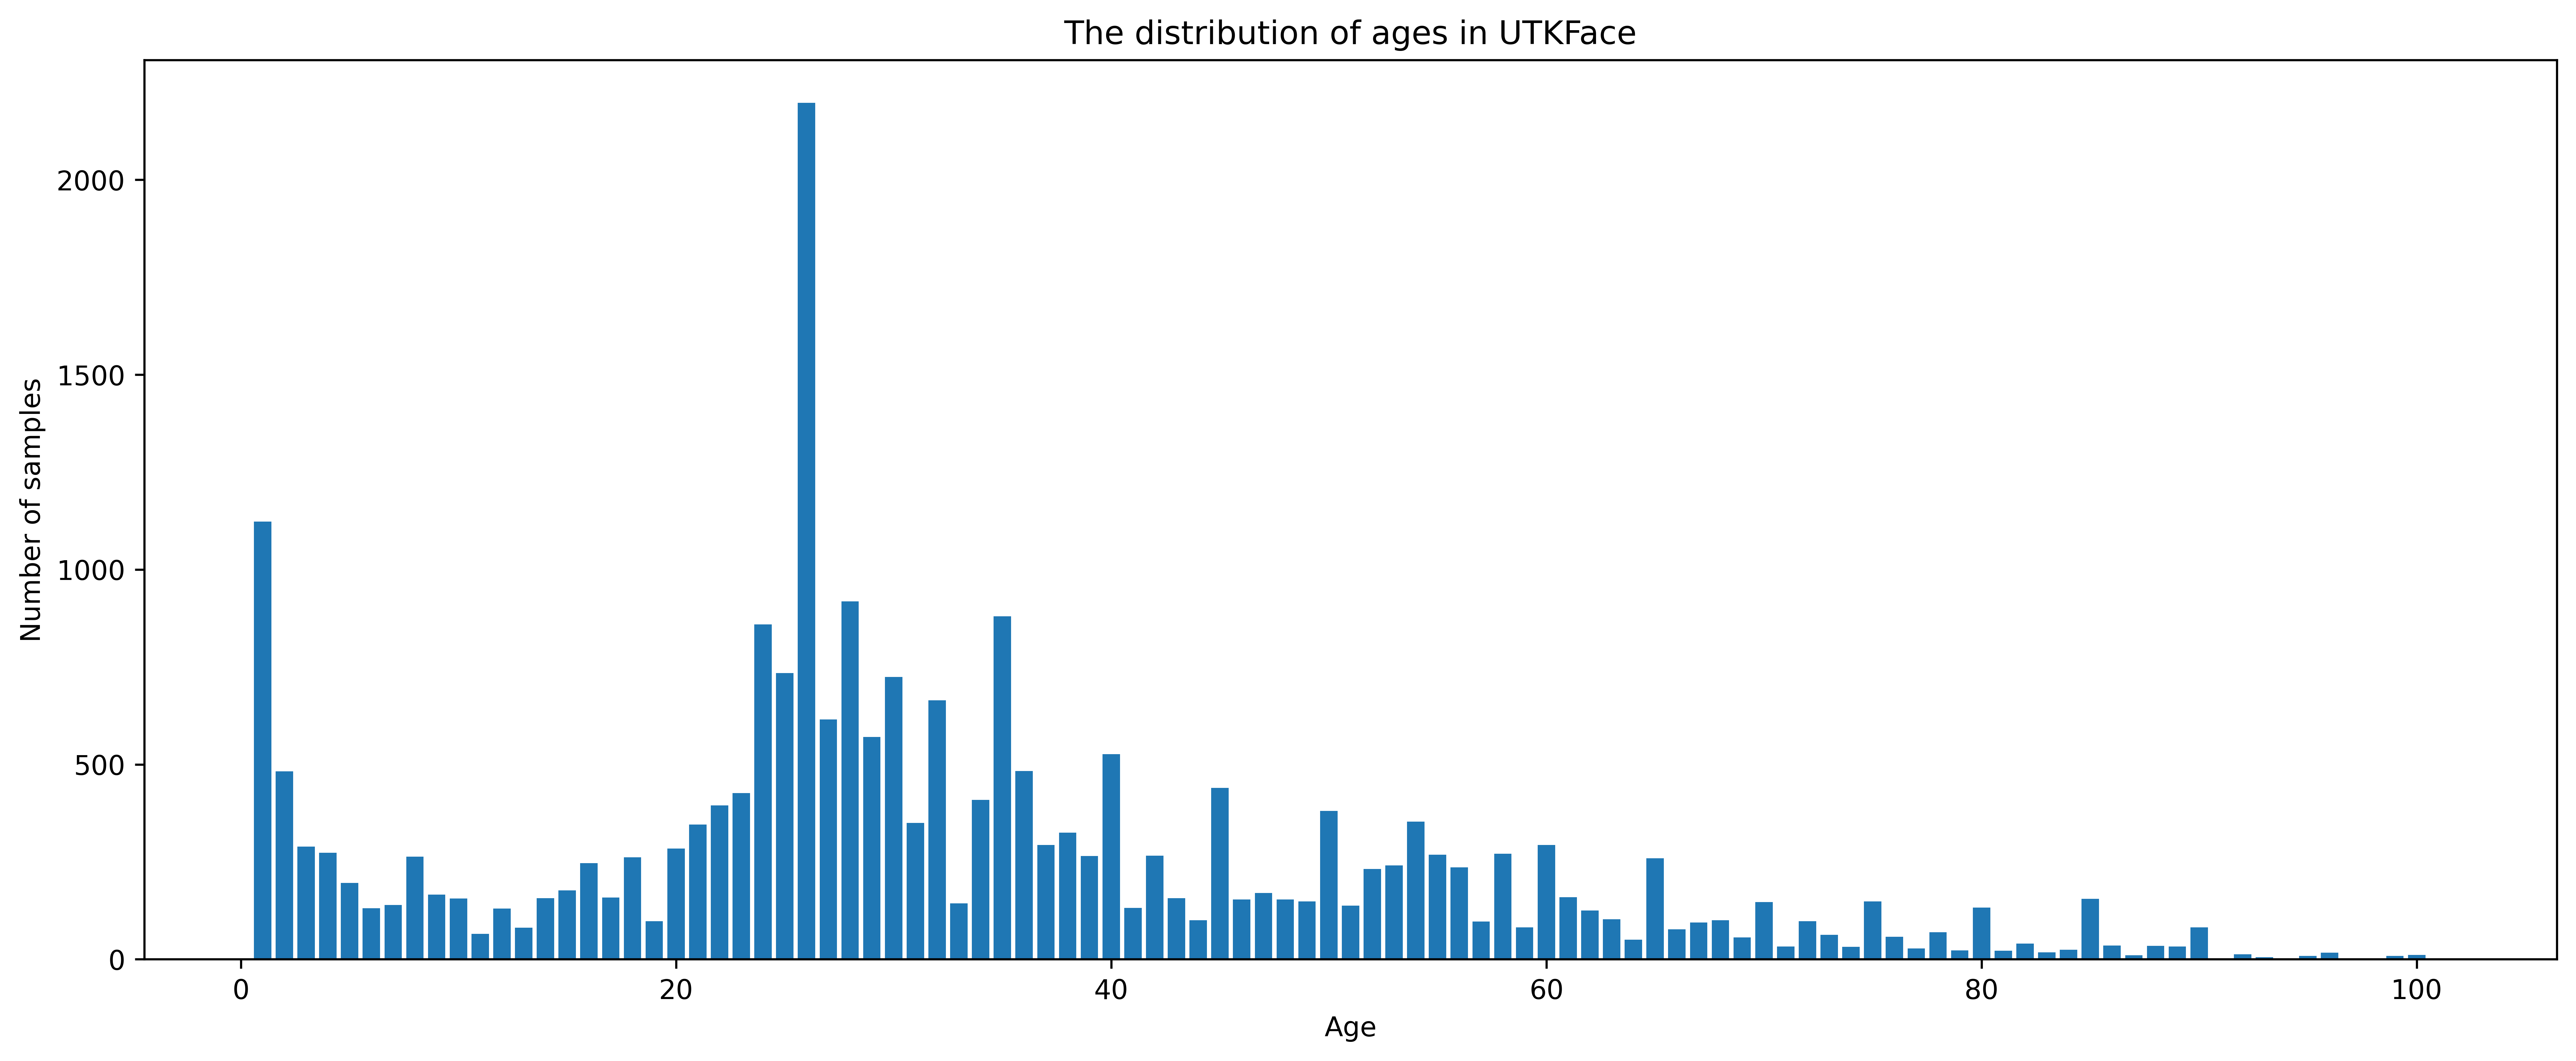

In [19]:
plt.figure(figsize = (16, 6), dpi = 600)
plt.title('The distribution of ages in UTKFace')
plt.bar(x = ages, height = counts)
plt.xlabel('Age')
plt.ylabel('Number of samples')
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'UTKFace', 'The distribution of ages in UTKFace')
)
plt.show()

In [20]:
races, counts = np.unique(labels_df['race'], return_counts = True)

In [29]:
sorted_idx = np.argsort(counts)[::-1]
counts = counts[sorted_idx]
races = races[sorted_idx]

In [30]:
race_translation = {
    0 : 'White',
    1 : 'Black',
    2 : 'Asian',
    3 : 'Indian',
    4 : 'Other'
}

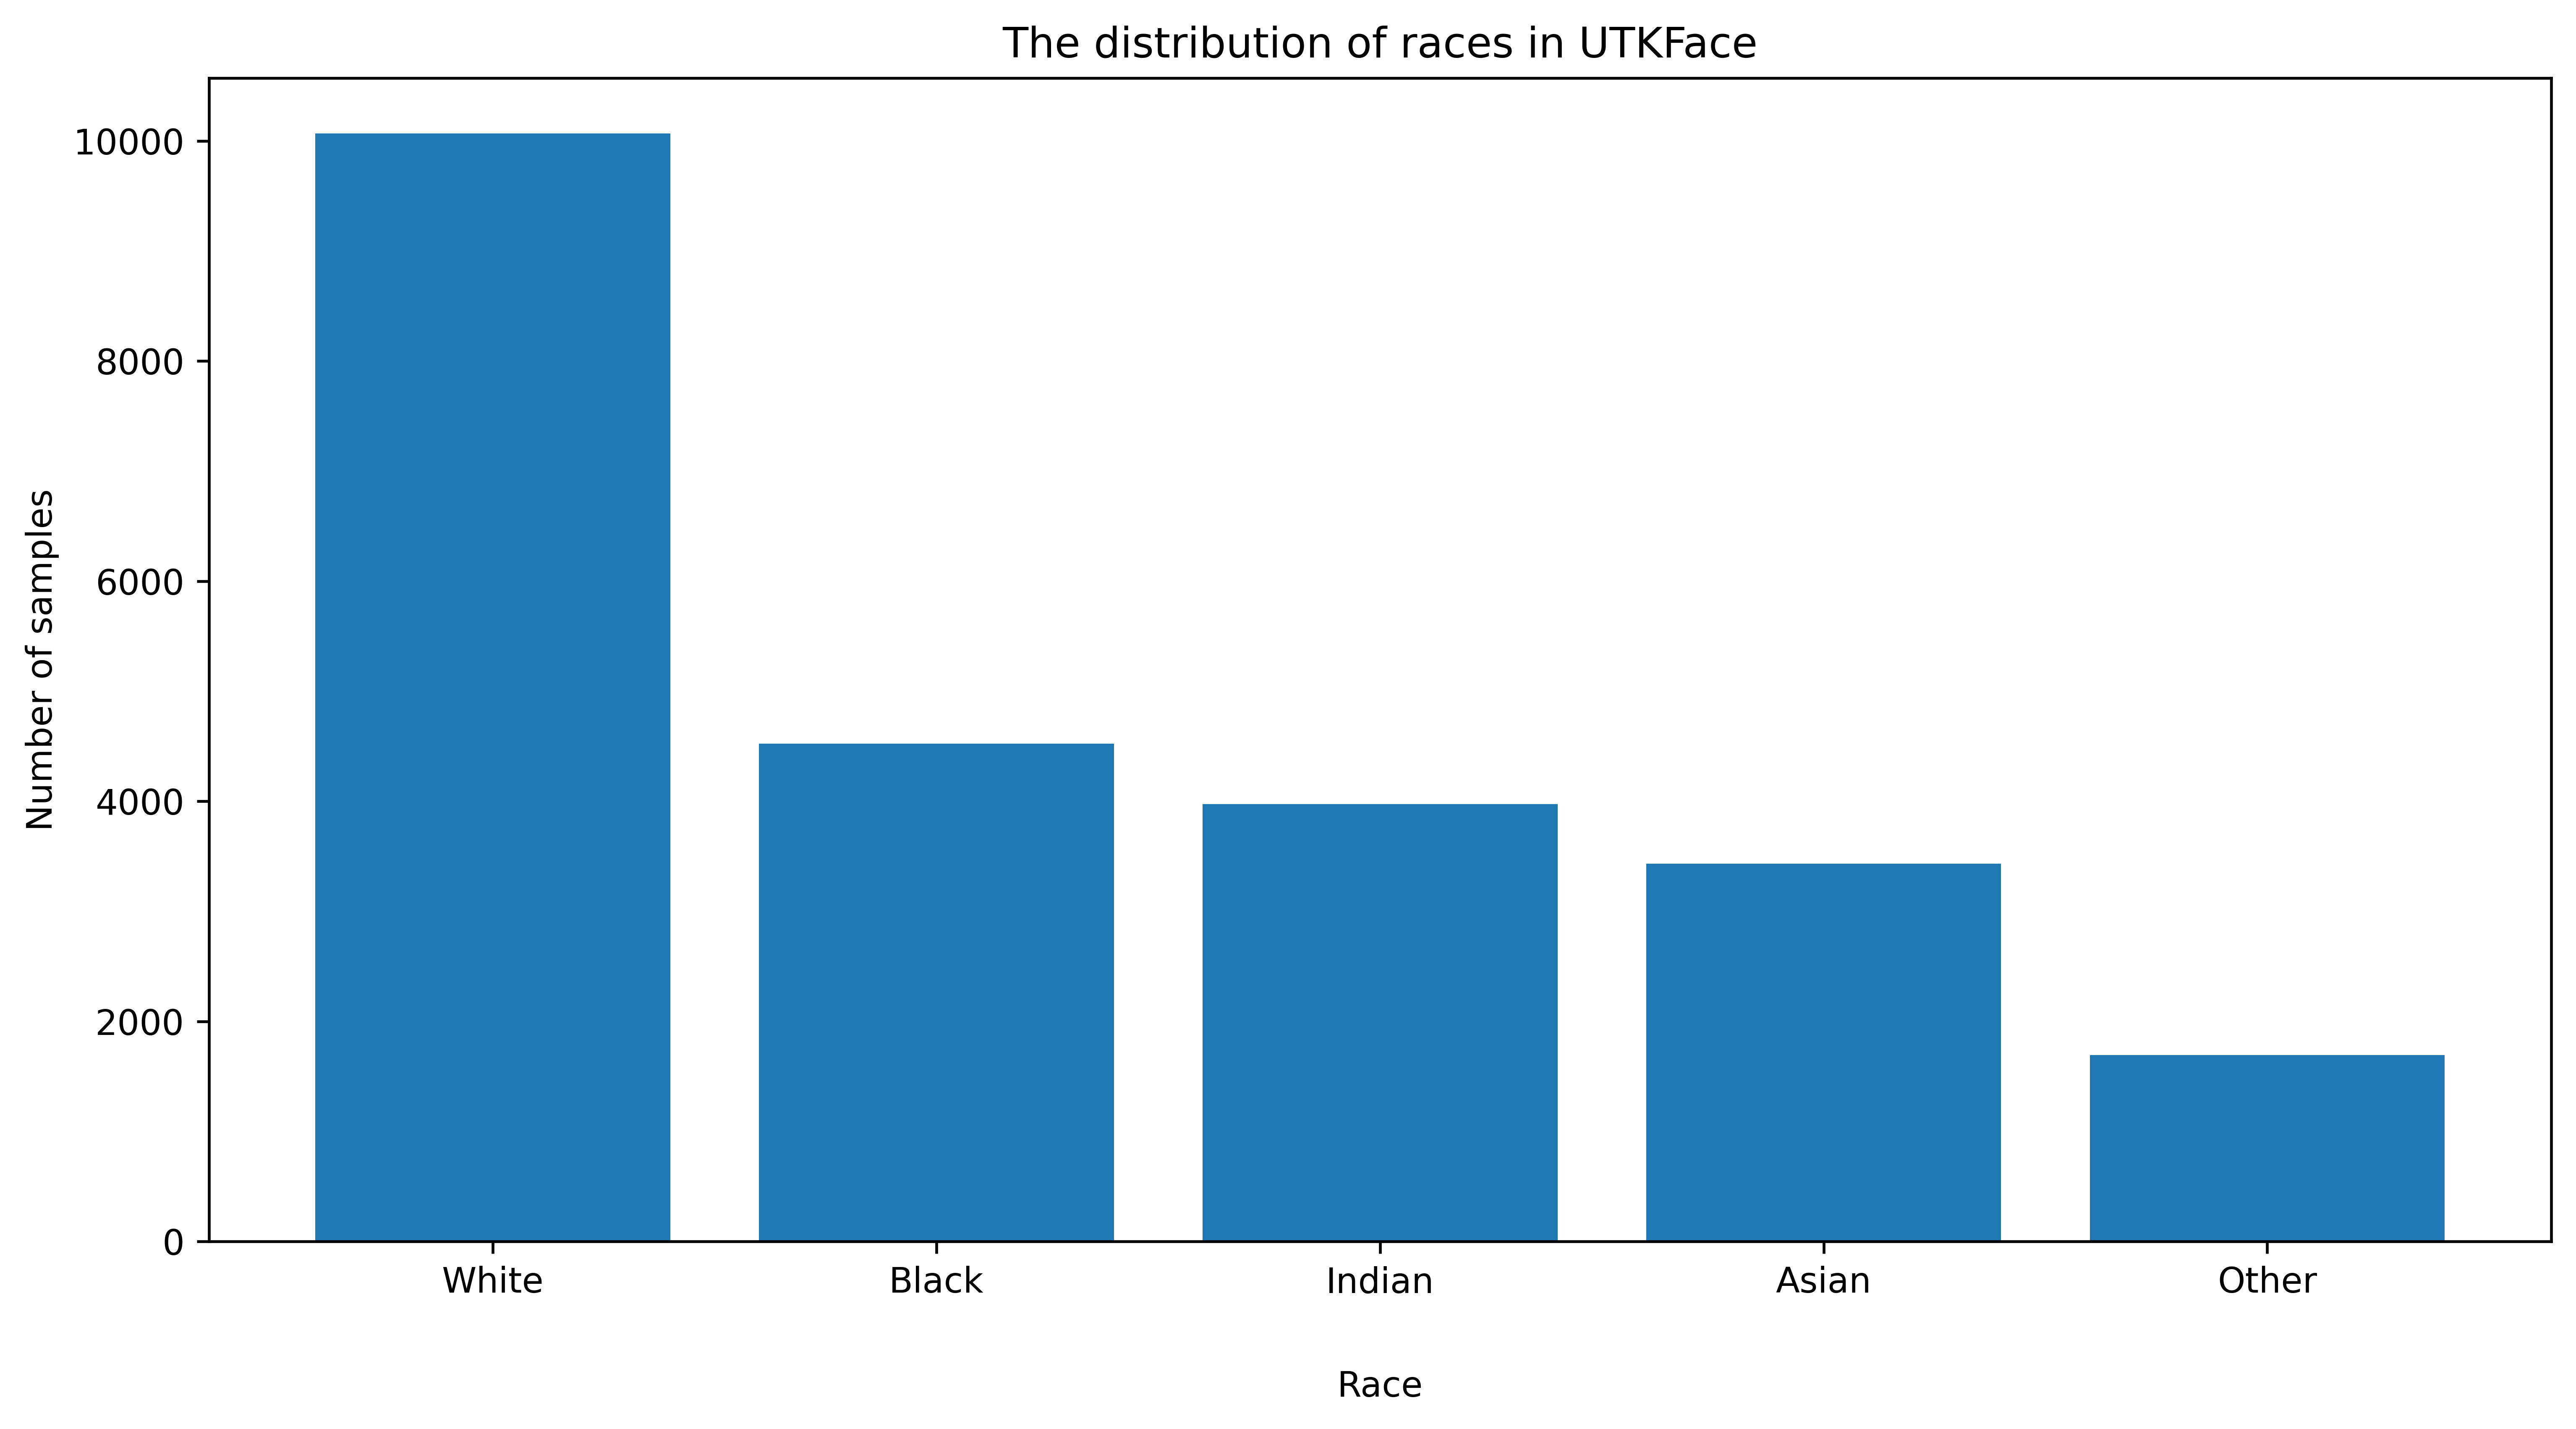

In [31]:
plt.figure(figsize = (12, 6), dpi = 600)
plt.title('The distribution of races in UTKFace')
plt.bar(x = [race_translation[race] for race in races], height = counts)
plt.xlabel('Race', labelpad = 20)
plt.ylabel('Number of samples')
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'UTKFace', 'The distribution of races in UTKFace')
)
plt.show()

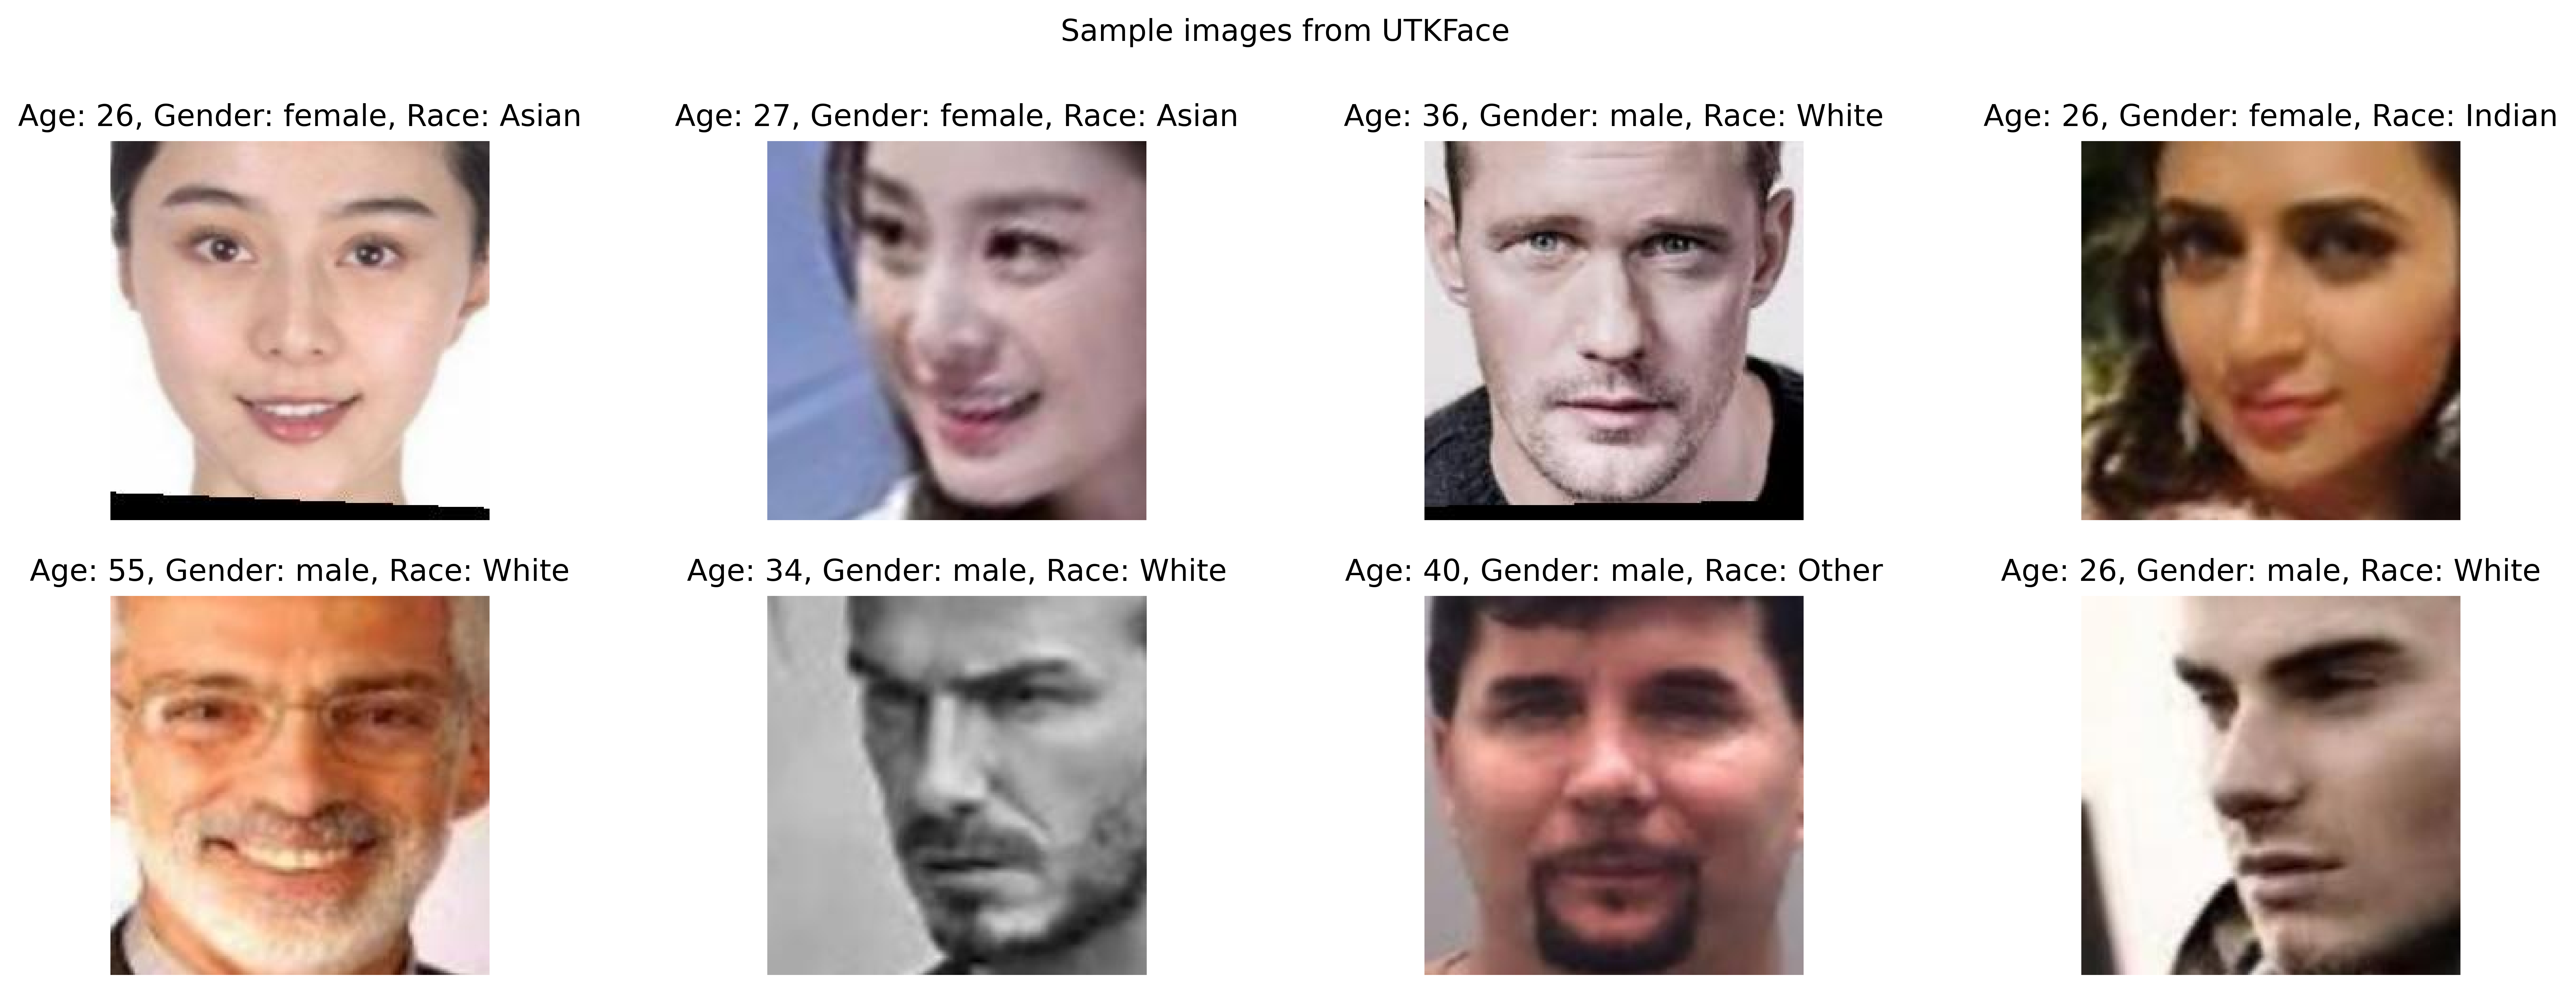

In [40]:
plt.figure(figsize = (18, 6), dpi = 600)
plt.title('Sample images from UTKFace', pad = 40)
plt.axis('off')
for i in range(8):
    idx = np.random.randint(low = 0, high = len(labels_df))
    image = plt.imread(os.path.join(new_images_dir, labels_df['filename'][idx]))
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f'Age: {labels_df['age'][idx]}, Gender: {'male' if labels_df['gender'][idx] else 'female'}, Race: {race_translation[labels_df['race'][idx]]}')
    plt.axis('off')
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'UTKFace', 'Sample images from UTKFace')
)
plt.show()